# CS512 (AI) Lab Assignment - 1 

###**Due on: 6th Feb 2022 2400 Hrs | Total Marks: 100**

**Submission Instructions**:

All submission is through google classroom submitting the colab (.ipynb file). In case you face any trouble with the submission, please contact the TAs:

*   Armaan Garg, 2019CSZ0002@iitrpr.ac.in
*   Shivam Kainth shivam.20csz0006@iitrpr.ac.in

Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.



**Penalty Policy**: Late submissions will attract penalties. There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. for 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.

All the plots and observations should be added to the colab notebook itself.

**Naming Convention**:

Name the colab file submission as follows: Name_rollnumber_Labnumber.ipynb
E.g. if your name is ABC, roll number is 2019csx1234 and submission is for assignment1 then you should name the colab file as: ABC_2019csx1234_Lab1.ipynb


The purpose of this assignment is to exercise your basic understanding of intelligent agents and state space search, and to help you apply these concepts.
In this assignment, you will be experimenting with different AI search techniques that has been discussed in class. You are provided with a starter code for this. The code consists of several segments, some of which you will need to read and understand to complete the assignment, and some of which you can ignore.


# Problem Statement 1 (60 marks)

##Save the world from Cersei Lannister (in a maze game setup).##

Story:
Melisandre, also known as red woman, was born in the city of Melony (this city lies in the centre of the maze world), and is known to have supernatural powers. She has been known to be lived for 2000 years and used her sorcery to save the world from evil lannisters. It has been recently known that her immortality comes from the pendant she wears and few wise men say that the owner can only live for a few seconds without the magical pendant.	
But on a very dark day, evil Cersei Lannister stole her pendant and hidden herself into an unknown city of labyrinths. Now it’s our time to save the world and find Cersei as soon as possible and return the pendant to Melisandre and return balance to the world. Thanks to AI this could be done in a very fast and efficient manner. 
Agent Jon Snow (the AI master) is put up to the task of finding the pendant. Thanks to agent Snow we came to know the location of where cercei is hiding and we also have the maze world map. But it will take ages for a person to reach there but with agent snow’s AI mastership this could be done in mere seconds. 
_______________________________________

The maze world is generated from empty grid and then adding walls of random length to random locations.

The goal is to find a path from corner to corner. Possible moves are Up, Down, Left or Right. Distance or length is measured with manhattan distance which is the sum of vertical and horizontal lengths.

Algorithms to compare to find a path :


*   BFS: breadth first search (10 marks)
*   DFS: depth first search  (10 marks)
*   UCS: Uniform-Cost Search  (10 marks)
*   IDS: Iterative Deepning Search (10 marks)
*   A* (A-star) heuristic Search (20 marks)


### Write code in Algorithm section below###

There are two performance metrics:

1.   Number of nodes explored
2.   Time taken for execution

###You need to plot graphs for both the metrics. Also, write your observations by pointing out the key differnces among the algorithms. (Use Graph plots & Observations section below to write your code)###

# The maze

In [ ]:
import numpy as np
from queue import Queue
from queue import PriorityQueue
from queue import deque
from copy import deepcopy
import random

def create_maze(size, n_walls, length_walls=0.3):
    maze = np.ones((size, size), dtype=bool)

    for i in range(n_walls):
        row, col = np.random.randint(0, size - 1, 2)

        wall = np.random.poisson(length_walls) * np.random.choice([-1, 1])

        if np.random.choice([True, False]):
            row = make_range(row, wall, size)
        else:
            col = make_range(col, wall, size)

        maze[row, col] = False

    maze[0, 0] = True
    maze[size - 1, size - 1] = True
    return maze


def make_range(start, length, m):
    d = np.clip(np.array([start + length, start]), 0, m - 1)
    return list(range(d.min(), d.max() + 1))


# Algorithm section

In [ ]:
"""
Write a function for each algorithm in this section
"""

"""
Write a function for each algorithm in this section
"""
EAST = (0,1)
WEST = (0,-1)
NORTH = (-1,0)
SOUTH = (1,0)

# r_x = [0, 0, -1, 1]
# r_y = [1, -1, 0, 0]

# r_x = [0, -1,1,0]
# r_y = [1, 0,0,-1]

r_x = []
r_y = []

r_x.append(EAST[0])
r_x.append(WEST[0])
r_x.append(NORTH[0])
r_x.append(SOUTH[0])

r_y.append(EAST[1])
r_y.append(WEST[1])
r_y.append(NORTH[1])
r_y.append(SOUTH[1])




def is_cordinate_valid(i,j,N):
    return (i >= 0) and (i < N) and (j >= 0) and (j < N)

def can_ai_master_move(adj,maze,maze_size):
    return is_cordinate_valid(adj[0],adj[1],maze_size) and maze[adj[0]][adj[1]]


def dfs(maze, start, goal):

    finished = False
    maze_size = len(maze)
    st = deque([])
    visited = [[False for i in range(maze_size)] for j in range(maze_size)]
    visited[start[0]][start[1]] = True
    # visited = set([start])
    explored_nodes = []
    path = []
    st.append(start)
    map = {start: None}
    while(len(st) > 0):
        curr = st.pop()

        # st.pop()
        explored_nodes.append(curr)
        if(curr[0] == goal[0] and curr[1] == goal[1]):
            finished = True
            break
        # if(visited[curr[0]][curr[1]] == False):
        #     visited[curr[0]][curr[1]] = True

        for i in range(4):
            p_x = curr[0]+r_x[i]
            p_y = curr[1]+r_y[i]
            adj = (p_x, p_y)
            if(can_ai_master_move(adj, maze, maze_size) and visited[adj[0]][adj[1]] == False):
                st.append(adj)
                # visited.add(adj)
                visited[adj[0]][adj[1]] = True
                map[adj] = curr  # adj

    if(finished):
        cord = goal
        while True:
            path.append(cord)
            cord = map[cord]
            if(cord == start):
                path.append(start)
                break
    return finished, explored_nodes, path


def bfs(maze,start,goal):
    finished = False
    maze_size = len(maze) # n*n
    q = Queue()
    visited = [[False for i in range(maze_size)] for j in range(maze_size)]
    path = []
    explored_nodes = []
    map = { start: None }
    q.put(start)
    # path.append(start)
    visited[start[0]][start[1]] = True
    while q.qsize() > 0:
        curr = q.get()
        explored_nodes.append(curr)
        if( curr[0] == goal[0] and curr[1] == goal[1]):
            finished = True
            break
        for i in range(4):
            p_x = curr[0]+r_x[i]
            p_y = curr[1]+r_y[i]
            adj = (p_x,p_y)
            if( can_ai_master_move(adj,maze,maze_size) and visited[adj[0]][adj[1]] == False ):
                visited[adj[0]][adj[1]] = True
                q.put(adj)
                map[adj] = curr 

    if( finished ):
        cord = goal
        while True:
            path.append(cord)
            cord = map[cord]
            if( cord == start ): 
                path.append(start)
                break
    return finished,explored_nodes,path

def ucs(maze,start,goal):
    p_q = PriorityQueue()
    finished = False
    maze_size = len(maze)
    # visited = [[False for i in range(maze_size)] for j in range(maze_size)]
    visited = set([start])
    path = []
    explored_nodes = []
    cost_so_far = { start: 0}
    map = { start: None }
    goal_cost = 0
    p_q.put((0,start))
    # visited.add(start)
    while(p_q.empty() == False):
        # curr_tuple = p_q.get()
        # curr = curr_tuple[1]
        curr_cost,curr =  p_q.get()
        explored_nodes.append(curr)
        if(curr[0] == goal[0] and curr[1] == goal[1] ):
            finished = True
            goal_cost = cost_so_far[curr]
            break
        for i in range(4):
            p_x = curr[0]+r_x[i]
            p_y = curr[1]+r_y[i]
            adj = (p_x,p_y)
            if( can_ai_master_move(adj,maze,maze_size)  ):
                new_cost = cost_so_far[curr] + 1
                if( adj not in visited or new_cost < cost_so_far[adj]):
                    visited.add(adj)
                    cost_so_far[adj] = new_cost
                    map[adj]=curr
                    p_q.put((new_cost,adj))
    if( finished ):
        cord = goal
        while True:
            path.append(cord)
            cord = map[cord]
            if( cord == start ): 
                path.append(start)
                break

    return finished,explored_nodes,path



def DLS(node,goal,limit,maze,maze_size,explored_nodes):
    
    st = deque([])
    st.append(node)
    visited = set([node[0]])
    # visited = np.zeros((maze_size,maze_size))
    # explored_nodes = []
    came_from = { node[0] : None }

    depth_dict = {}
    depth_dict[node[0]] = 0
    # visited[node[0][0]][node[0][1]] = 1
    finished = False
    while( len(st) > 0 ):
        curr = st.pop()
        # print("curr : ",curr)
        n_d = curr[1]
        explored_nodes.append(curr)
        if curr[0] == goal:
            finished= True
            break
        # if curr[1] < limit or depth_dict[curr[0]] <= limit :
        #     break
        if depth_dict[curr[0]] <= limit:

          for i in range(4):
              p_x = curr[0][0]+r_x[i]
              p_y = curr[0][1]+r_y[i]
              adj = (p_x,p_y)
            
              if( can_ai_master_move(adj,maze,maze_size) and adj not in visited ):
                  # print("adj : ",adj,n_d+1)
                  st.append([adj,n_d+1])
                  depth_dict[adj] = depth_dict[curr[0]] + 1
                  visited.add(adj)
                  # visited[adj[0]][adj[1]] = 1
                  # print(visited)
                  came_from[adj] = curr[0]

    return finished,explored_nodes,came_from

def ids(maze,start,goal):
    path=[]
    maze_size = len(maze)
    depth = 1
    max_depth = len(maze)**2
    finished = False
    # prev_visited=set([])
    # for depth in range(max_depth):
    explored_nodes=[]
    while depth <= max_depth:
        # print("depth: ",depth)
        finished,explored_nodes,came_from = DLS([start,0],goal,depth,maze,maze_size,explored_nodes)
        # print("visited : ",visited)
        if(finished):
            cord = goal
            while True:
                path.append(cord)
                cord = came_from[cord]
                if(cord == start):
                    path.append(start)
                    break
                
            break
        depth = depth * 2
    return finished, explored_nodes, path


def manhattan_heuristic(size):
    def f(x):
        return (size - 1 - x[0]) + (size - 1 - x[1])
    return f


def astar(maze,start,goal,heuristic):
    path=[]
    explored_nodes=[]
    visited = set([])
    came_from = { start: None }
    cost_so_far = { start: 0 }
    p_q = PriorityQueue()
    maze_size = len(maze)
    p_q.put((0, start))
    finished = False
    # visited.add(start)
    while(p_q.empty() == False):
        curr_cost, curr = p_q.get()
        explored_nodes.append(curr)
        if(curr[0] == goal[0] and curr[1] == goal[1]):
            finished = True
            goal_cost = cost_so_far[curr]
            break
        for i in range(4):
            p_x = curr[0]+r_x[i]
            p_y = curr[1]+r_y[i]
            adj = (p_x, p_y)
            if(can_ai_master_move(adj, maze, maze_size)):
                new_cost = cost_so_far[curr] + 1
                if(adj not in visited or new_cost < cost_so_far[adj]):
                    visited.add(adj)
                    cost_so_far[adj] = new_cost
                    came_from[adj] = curr
                    p_q.put((new_cost+heuristic(adj), adj))
    if(finished):
        cord = goal
        while True:
            path.append(cord)
            cord = came_from[cord]
            if(cord == start):
                path.append(start)
                break
    return finished,explored_nodes,path





# Execution section

In [ ]:
from collections import namedtuple #Like the dictionary type objects, it contains keys and that are mapped 
#to some values. In this case we can access the elements using keys and indexes.

from functools import partial # You can create partial functions in python by using the partial function from 
#the functools library. Partial functions allow one to derive a function with x parameters to a function 
#with fewer parameters and fixed values set for the more limited function.

from timeit import default_timer as timer
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tabulate #Tabulate is an open-source python package/module which is used to print 
#tabular data in nicely formatted tables

import tqdm
import os

np.random.seed(0)

SIZE = 100
START = (0, 0) 
GOAL = (SIZE - 1, SIZE - 1)
OBSTACLE_COUNT = SIZE ** 2 // 30
OBSTACLE_SIZE = 7

ALGOS = [
    ("DFS", partial(dfs, start=START, goal=GOAL)),
    ("BFS", partial(bfs, start=START, goal=GOAL)),
    ("UCS", partial(ucs, start=START, goal=GOAL)),
    ("IDS", partial(ids, start=START, goal=GOAL)),
    (
        "A-star",
        partial(astar, start=START, goal=GOAL, heuristic=manhattan_heuristic(SIZE)),
    ),
]

Result = namedtuple(
    "Result", ["round", "finished", "n_explored", "length_path", "seconds", "algo"]
)


def simulate(n, max_good_mazes=float("inf")):
    results = []
    good_mazes = []
    for i in tqdm.tqdm(range(n), mininterval=1):
        maze = create_maze(SIZE, OBSTACLE_COUNT, OBSTACLE_SIZE)
        for algo_name, algo in ALGOS:
            time_start = timer()
            finished, explored_nodes, path = algo(maze)
            time_end = timer()
            r = Result(
                round=i,
                finished=finished,
                n_explored=len(explored_nodes),
                length_path=None if not finished else len(path),
                seconds=time_end - time_start,
                algo=algo_name,
            )
            results.append(r)
            if finished and algo_name == ALGOS[0][0]:
                good_mazes.append(maze)
                if len(good_mazes) >= max_good_mazes:
                    break

    results_df = pd.DataFrame(results)
    return results_df, good_mazes

result_df, good_mazes = simulate(1000)

""" for reference to print the results in a table format"""

result_agg = result_df.groupby(["finished", "algo"])[
    "seconds", "n_explored", "length_path"
].mean()

result_agg["count"] = result_df.groupby(["finished", "algo"]).size()
result_agg = result_agg.reset_index()

print(tabulate.tabulate(result_agg.values, result_agg.columns, tablefmt="pipe"))




100%|██████████| 1000/1000 [05:38<00:00,  2.96it/s]

| finished   | algo   |   seconds |   n_explored |   length_path |   count |
|:-----------|:-------|----------:|-------------:|--------------:|--------:|
| False      | A-star | 0.0395179 |      2726.11 |       nan     |     430 |
| False      | BFS    | 0.0307366 |      2725.14 |       nan     |     430 |
| False      | DFS    | 0.0157145 |      2725.14 |       nan     |     430 |
| False      | IDS    | 0.114261  |     14199.5  |       nan     |     430 |
| False      | UCS    | 0.0343336 |      2725.14 |       nan     |     430 |
| True       | A-star | 0.0429717 |      2998.56 |       212.393 |     570 |
| True       | BFS    | 0.0790599 |      7108.25 |       212.393 |     570 |
| True       | DFS    | 0.0258654 |      4331.54 |      1104.68  |     570 |
| True       | IDS    | 0.111592  |     14336.3  |       961.442 |     570 |
| True       | UCS    | 0.0896949 |      7114.04 |       212.393 |     570 |



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


# Graph plots & Observations

---

Plot graphs related to the various parameters of algorithms for the various test cases given in the next section. 

1.   Plot one graph, which compares the number of nodes explored by every algorithm, while solving the problem.

2.  Plot another graph, comparing the total time taken by each algorithm to complete the execution. 

## Libraries for reference
https://seaborn.pydata.org/

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

https://matplotlib.org/stable/tutorials/introductory/pyplot.html


 


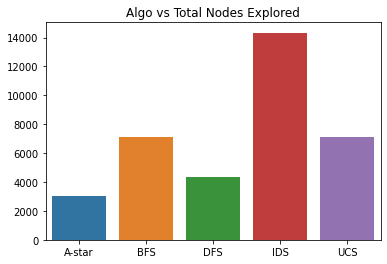

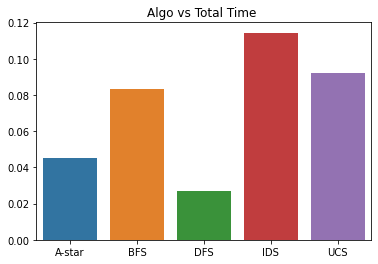

In [ ]:
""" graph plot code and observations"""
import matplotlib.pyplot as plt
import seaborn as sns

# print("result_df = ",result_df)
# algo_list=result_df.groupby(["algo"])

# print("algo_list : ",algo_list)
# time_taken=result_df.groupby(["algo"])["seconds"]
# ax = sns.barplot(x=algo_list,y=time_taken)


# print(result_agg)

time_taken={}
node_explored={}


for i in range(len(result_agg)):


      time_taken[result_agg['algo'][i]]=result_agg['seconds'][i]
      node_explored[result_agg['algo'][i]]=result_agg['n_explored'][i]

ax = sns.barplot(x=list(node_explored.keys()),y=list(node_explored.values()))
plt.title("Algo vs Total Nodes Explored")
plt.show()


ax = sns.barplot(x=list(time_taken.keys()),y=list(time_taken.values()))

plt.title("Algo vs Total Time ")
plt.show()

Observations:


1. The total number of explored nodes in IDS are maximum as compared to other algorithms and performance time is also worst as compared to other algorithms, because of always traversing from root node in each iteration of depth which leads to exponential time complexity.

2. DFS and Astar performs well as compared to other algorithms in term of time complexity. DFS has less time than Astar but more number of explored nodes as compared to Astar.It is clearly visible from the plot that DFS and Astart both possess time vs space tradeoff. 

3. The performance time of BFS is less then IDS but more as compared to DFS and Astar because of lots of branching.

4. The perfomance of BFS and UCS are similar because of unit edge weights in both algorithms. Although UCS takes more time because of priority queue data structre as compared to queue in BFS.

5. Due to less number of walls dfs performs better then BFS as it does not stuck in longer depth branch but dfs can be slower due to explored unnecessary depth.

6. Although DFS is uninformed search where Astar is informed search.Because of prior information about the goal As a better heuristic can lead to optimal solution where time taken and number of explored nodes both are minimal.



### Test Case 1:


In [ ]:
START = (1, 1) 
GOAL = (SIZE - 1, SIZE - 1)
result_df, good_mazes = simulate(1000)

100%|██████████| 1000/1000 [05:03<00:00,  3.30it/s]


### Test Case 2

In [ ]:
START = (2, 0) 
GOAL = (SIZE - 1, SIZE - 1)
result_df, good_mazes = simulate(1000)

100%|██████████| 1000/1000 [05:16<00:00,  3.16it/s]


### Test Case 3

In [ ]:
START = (1, 0) 
GOAL = (SIZE - 2, SIZE - 1)
result_df, good_mazes = simulate(1000)

100%|██████████| 1000/1000 [05:35<00:00,  2.98it/s]


### Test Case 4

In [ ]:
START = (3, 0) 
GOAL = (SIZE - 1, SIZE - 2)
result_df, good_mazes = simulate(1000)

100%|██████████| 1000/1000 [05:37<00:00,  2.96it/s]


### Test Case 5

In [ ]:
START = (1, 3) 
GOAL = (SIZE - 1, SIZE - 3)
result_df, good_mazes = simulate(1000)

100%|██████████| 1000/1000 [05:32<00:00,  3.00it/s]


# Problem Statement 2 (40 marks)
## So many Queens, how to manage?

During a gladiatorial contests at the roman empire, a fine king invited all his queens to witness the valour of the gladiators. However, the queens were not in likings of one-another and must not see eye-to-eye. Your job as the "Minister of Strategies" in King's office is to create a sitting arrangement for all queens, while keeping in mind that no two queens are in the "LINE OF SIGHT" of one another i.e. the queens must be avoided to be in the same row or column or diagonally. 

 The "minister of Strategies" had recently enrolled in the Class of Artificial Intellignece CS 512 and decided to use A* algorithm to solve the problem.


Heuristic to be used for this problem is " Number of attacked queens", where if any new queen is placed in "LINE of ATTACK" of other queen, the Heuristic is incremented by 1, else it is unchanged. 

**Can you propose a better heuristic for this problem? If yes, then compare the performance of A* with your proposed and the given heuristic. [15 marks]**

The G(n) function can be defined as the number of queens which are correctly placed at the given time. 
For eg:
if the state is  
0 0 1 0

1 0 0 0

1 0 0 0

0 0 0 1 

then only one queen is correctly placed while, three queens are in ATTACK mode.
#### Reference image
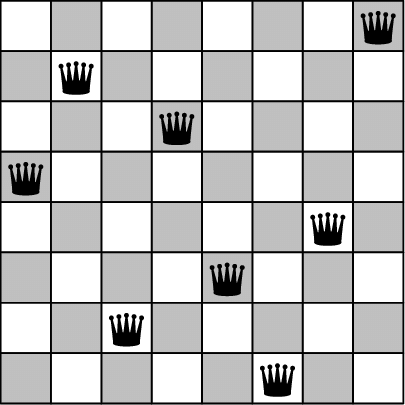


To solve this problem correctly. define the Heuristic function correctly, Apply A* agorithm to it and print the following information for each trial. Number of nodes explored, Optimal path cost, Total time taken for execution. [25 marks]

Consider in total, 5 trials,

 

---



1.   you have 4 queens in a 4x4 seating space.
2.   you have 5 queens in a 5x5 seating space.
3.   you have 6 queens in a 6x6 seating space.
4.  you have 7 queens in a 7x7 seating space.
5.  you have 8 queens in a 8x8 seating space.
5.  you have 9 queens in a 9x9 seating space.
5.  you have 10 queens in a 10x10 seating space.

----


In the end, plot a graph with all five trials in X-axis and following metrices in Y axis,
 * The number of nodes explored 
 * Optimnal path cost 
 * Total time taken by A* algorithm 

#### Trial 1: 4 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
# arr=np.zeros((size,size))
# size=4
# for i in range(size):
#   for j in range(size):
#     arr[i][j]= 0



#### Trial 2: 5 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
# size=5
# for i in range(size):
#   for j in range(size):
#     arr[i][j]= 0


#### Trial 3: 6 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
# size=6
# for i in range(size):
#   for j in range(size):
#     arr[i][j]= 0


#### Trial 4: 7 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
# size=7
# for i in range(size):
#   for j in range(size):
#     arr[i][j]= 0


#### Trial 5: 8 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
# size=8
# for i in range(size):
#   for j in range(size):
#     arr[i][j]= 0


#### Trial 6: 9 queens

In [ ]:
# Code to generate a 2D grid world
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
# size= 9
# for i in range(size):
#   for j in range(size):
#     arr[i][j]= 0

#### Trial 7: 10 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
# size= 10
# for i in range(size):
#   for j in range(size):
#     arr[i][j]= 0

Define heuristics

In [ ]:
# def queen_heuristic(state,goal):



def conflict_exist(cord_a,cord_b):
    return (cord_a[0] == cord_b[0] or cord_a[1] == cord_b[1] or (abs(cord_a[0] - cord_b[0]) == abs(cord_a[1] - cord_b[1]) )) 
    
def queen_heuristic(queen_cords,board_length):
    
    # print("child state : ",queen_cords)
    number_of_queens_attacked = 0
    for i in range(len(queen_cords)):
        for j in range(len(queen_cords)):
            if i!=j and conflict_exist(queen_cords[i],queen_cords[j]):
                number_of_queens_attacked += 1
                break
    return number_of_queens_attacked

  #### Your code Here #####
  

In [ ]:
# def new_heuristic(state,goal): # defining a new heuristics 
def path_between_queens(cord_a, cord_b):
    # print(cord_a,cord_b)
    path = []

    if cord_a[0] == cord_b[0] and cord_a[1] != cord_b[1]:  # same row
        x = cord_a[0]
        low = min(cord_a[1], cord_b[1])
        high = max(cord_a[1], cord_b[1])
        while low < high-1:
            path.append((x, low+1))
            low = low + 1

        return path

    elif cord_a[1] == cord_b[1] and cord_a[0]!= cord_b[0]:  # same col

        y = cord_a[1]

        low = min(cord_a[0], cord_b[0])
        high = max(cord_a[0], cord_b[0])

        while low < high-1:
            path.append((low+1, y))
            low = low + 1

        return path

    else:
        x1 = cord_a[0]
        y1 = cord_a[1]
        x2 = cord_b[0]
        y2 = cord_b[1]

        # print("x1 = ",x1)
        # print("x2 = ",x2)
        # print("y1 = ",y1)
        # print("y2 = ",y2)
        # y2 =
        # path = []
        if x1 > x2 and y1 > y2:
        	# if y1 > y2:
                diff = abs(y1 - y2)
                tx = x2
                ty = y2
                while (diff > 1):
                    tx = tx+1
                    ty = ty+1
                    path.append((tx,ty))
                    diff = diff - 1
        elif x1 > x2 and y1 < y2:
        	# else:
            diff = abs(y1 - y2)
            tx = x2
            ty = y2
            while (diff > 1):
                tx = tx+1
                ty = ty-1
                path.append((tx,ty))
                diff = diff -1
        elif x1 < x2 and y1 > y2:
            diff = abs(y1 - y2)
            tx = x1
            ty = y1
            while (diff > 1):
                tx = tx+1
                ty = ty-1
                diff = diff - 1
        elif x1 < x2 and y1 < y2:
                diff = abs(y1 - y2)
                tx = x2
                ty = y2
                while diff > 1:
                    tx = tx-1
                    ty = ty-1
                    path.append((tx,ty))
                    diff = diff -1
        return path




def is_attacking(state, cord_a, cord_b):
    if (cord_a[0] == cord_b[0] or cord_a[1] == cord_b[1] or (abs(cord_a[0] - cord_b[0]) == abs(cord_a[1] - cord_b[1]))):
        path = path_between_queens(cord_a,cord_b)
        # for cord in path:
        #     if cord in set(state):
        #         return False
        
        if len(set(state).intersection(set(path))) > 0:
            return False
        return True
    else:
        return False



# def conflict(board):
#     n = len(board)

#     row_frequency = [0] * n
#     main_diag_frequency = [0] * (2 * n)
#     secondary_diag_frequency = [0] * (2 * n)

#     for i in range(n):
#         row_frequency[board[i]] += 1
#         main_diag_frequency[board[i] + i] += 1
#         secondary_diag_frequency[n - board[i] + i] += 1

#     # print(row_frequency)
#     # print(main_diag_frequency)
#     # print(secondary_diag_frequency)

#     conflicts = 0
#     # formula: (N * (N - 1)) / 2
#     for i in range(2*n):
#         if i < n:
#             conflicts += (row_frequency[i] * (row_frequency[i]-1)) / 2
#         conflicts += (main_diag_frequency[i] * (main_diag_frequency[i]-1)) / 2
#         conflicts += (secondary_diag_frequency[i]
#                       * (secondary_diag_frequency[i]-1)) / 2
#     return int(conflicts)


def new_queen_heuristic(state, board_length):

    attacking_pair = 0

    # board = [0]*board_length
    # for row,col in state:
    #   board[row] = col

    l = deepcopy(state)

    while len(l) > 0:
        a = l.pop()
        # print("a = ",a)
        for b in l:
            # print("b = ",b)
            if is_attacking(state, a, b):
                attacking_pair += 1
    return attacking_pair

    # return conflict(board)


Your solution using A*

In [ ]:
# from typing import FrozenSet
# Your code goes here

# size = 10



def goal_test(state,heuristic):
    heuristic_val = heuristic(state, size)
    # print("nunmber of queen attacked = ",heuristic_val,state)
    if heuristic_val == 0:
        return True
    else:
        return False


def get_child_states(state, size):
    child_states = []
    parent_state = state
    for q_index, queen in enumerate(parent_state):
        new_positions = [(queen[0], row)
                         for row in range(size) if row != queen[1]]
        for new_position in new_positions:
            queen_positions = deepcopy(parent_state)
            queen_positions[q_index] = new_position
            child_states.append(queen_positions)
    return child_states


def already_visited(visited, key):

    if key in visited.keys():
        return True
    else:
        return False

def generate_random_board_state(size):
    cols = list(range(size))

    queen_cords = [(cols.pop(random.randrange(len(cols))), random.randrange(size)) for _ in
                   range(size)]
    return queen_cords

def state_cost(state,size):
  number_of_queens_correctly_placed = 0

  nummber_of_queens_attacked = 0

  val = queen_heuristic(state,size)

  number_of_queen_correctly_placed = size - val 
  return number_of_queens_correctly_placed

def n_queen_astar(start_state,size,heuristic):
    # start_state = generate_random_board_state(size)
    # state = [(0,1),(1,1),(2,0),(3,2)]
    # state = [(0, 3), (3, 2), (2, 1), (1, 1)]
    # print("state : ",state)
    path = []
    cost = state_cost(start_state, size)
    # print("cost : ",cost)
    p_q = PriorityQueue()
    visited = {}
    came_from = {}
    cost_so_far = {}
    explored_nodes = []
    p_q.put((cost, start_state))
    visited[frozenset(start_state)] = True
    came_from[frozenset(start_state)] = None

    start_state_cost = state_cost(start_state,size)

    cost_so_far[frozenset(start_state)] = cost
    finished = False
    goal_state = None
    # print("visited: ",visited)
    while(p_q.empty() == False):
        # print("length of queue = ",p_q.qsize())
        curr_cost, curr_state = p_q.get()
        # print("popped_cost = ",curr_cost)
        explored_nodes.append(curr_state)

        if goal_test(curr_state,heuristic):
            # print("found : ",curr_state)
            finished = True
            goal_state = curr_state
            break
            # return True,curr_state,explored_nodes,came_from
        else:
            child_states = get_child_states(curr_state, size)
            # print("child_states : ", child_states )
            # print("length : ", len(child_states))
            for child in child_states:
                new_cost = cost_so_far[frozenset(curr_state)] + state_cost(curr_state,size)
                # if already_visited(visited,frozenset(child)) == False

                if already_visited(visited, frozenset(child)) == False or new_cost < cost_so_far[frozenset(child)]:
                    p_q.put((new_cost+heuristic(child, size), child))
                    cost_so_far[frozenset(child)] = new_cost
                    visited[frozenset(child)] = True
                    came_from[frozenset(child)] = curr_state
            # print("p_q = ",p_q.qsize())
            # print("visited : ",visited)
    total_cost = 0
    if(finished):
        cord = goal_state
        total_cost += cost_so_far[frozenset(cord)]
        while True:
            path.append(cord)
            # path.add(frozenset(cord))
            cord = came_from[frozenset(cord)]
            total_cost += cost_so_far[frozenset(cord)]
            if(cord == start_state):
                path.append(start_state)
                # path.add(frozenset(start_state))
                break
    return finished, goal_state, explored_nodes, path,total_cost




    size_type  time_taken  explored_state  path_cost heuristic_type
0           4    0.002010               4          4  old_heuristic
1           4    0.001960               4          4  new_heuristic
2           5    0.003267               5          5  old_heuristic
3           5    0.005619               5          5  new_heuristic
4           6    0.012265               8          8  old_heuristic
5           6    0.017382               8          8  new_heuristic
6           7    0.013737               6          6  old_heuristic
7           7    0.025622               7          7  new_heuristic
8           8    0.081304              16         14  old_heuristic
9           8    0.041501               7          7  new_heuristic
10          9    0.235324              29         19  old_heuristic
11          9    0.295315              29         19  new_heuristic
12         10    0.555024              44         22  old_heuristic
13         10    0.652743              44       

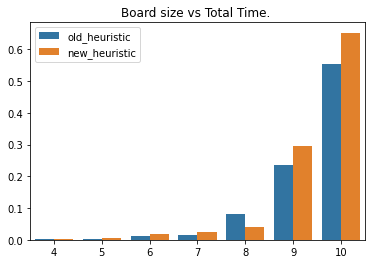

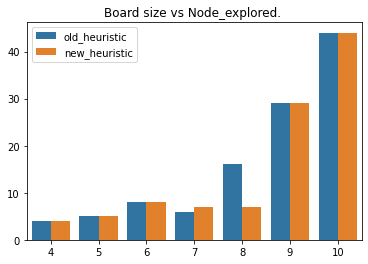

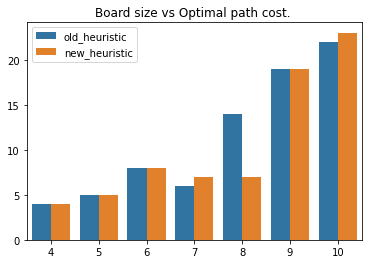

In [ ]:




time_taken=[]
node_exp = []
path_cost=[]

min_size = 4
max_size = 11


size_type=[]
heuristic_type=[]
goal = []




for size in range(min_size,max_size):

    start_state = generate_random_board_state(size)
    time_start = timer()
    finished,goal_state,explored_nodes,path,total_cost = n_queen_astar(start_state,size,queen_heuristic)
    time_end = timer()
    time_taken.append(time_end-time_start)
    node_exp.append(len(explored_nodes))
    path_cost.append(len(path))
    size_type.append(size)
    heuristic_type.append('old_heuristic')
    goal.append(goal_state)

    time_start_new = timer()
    finished_new,goal_state_new,explored_nodes_new,path_new,total_cost_new = n_queen_astar(start_state,size,new_queen_heuristic)
    time_end_new = timer()

    time_taken.append(time_end_new-time_start_new)
    node_exp.append(len(explored_nodes_new))
    path_cost.append(len(path_new))
    size_type.append(size)
    heuristic_type.append('new_heuristic')
    goal.append(goal_state_new)

# df = pd.DataFrame({ 'size_type': size_type ,'time_taken': time_taken,  'explored_state': node_exp , 'path_cost': path_cost, 'heuristic_type': heuristic_type })

# print(df)

# for size in range(min_size,max_size):
#     time_start = timer()
#     finished,goal_state,explored_nodes,path,total_cost = n_queen_astar(size,new_queen_heuristic)
#     time_end = timer()
#     time_taken.append(time_end-time_start)
#     node_exp.append(len(explored_nodes))
#     path_cost.append(total_cost)
#     size_type.append(size)
#     heuristic_type.append('new_heuristic')
#     goal.append(goal_state)


df = pd.DataFrame({ 'size_type': size_type ,'time_taken': time_taken,  'explored_state': node_exp , 'path_cost': path_cost, 'heuristic_type': heuristic_type })

# df.head()
print(df)


ax = sns.barplot(x=size_type,y=time_taken, hue=heuristic_type)
plt.title("Board size vs Total Time. ")
plt.show()


ax = sns.barplot(x=size_type,y=node_exp, hue=heuristic_type)
plt.title("Board size vs Node_explored. ")
plt.show()

ax = sns.barplot(x=size_type,y=path_cost, hue=heuristic_type)
plt.title("Board size vs Optimal path cost. ")
plt.show()



Observations:

1. Astar performs better as compared to exhaustive search as we can use the prior information of the goal state that each queen lie on the different rows then generate child state accordingly.

2. A New heuristic will be finding the number of attacking pairs (where other queens also considers as obstacles) will provide the more accurate value as compared to number of queens attacked. 
consider the case where all queens (Q1,Q2,Q3,Q4) placed on diagonal for 4x4 size.In such case number of queens attacked are 4 but the number of attacking pairs are only 3((Q1,Q2),(Q2,Q3)(Q3,Q4)).Here Q1 can not attack Q3 because Q2 act as obstacle in between Q1 and Q2.Hence it is more accurate than finding number of queens attacks only where no obstacles are taken into consideration rather then it won't have much impact for smaller values of N.
But time computation for number of attacking pairs with obstacle consideration is more as compared to previous heuristic but number of states explored less in most of the cases.

